In [2]:
import pandas as pd
import seaborn as sns   
import numpy as np
import matplotlib.pyplot as plt


# Je charge mon dataset et je commence par faire une analyse de la vue d'ensemble : comment nos données sont réparties, le nombre de valeurs manquantes et quelle approche adopter.

# Visualisation grâce à une heatmap pour mieux voir la répartition des données manquantes et essayer de prendre une décision. En effet, on peut supprimer ou remplir en imputant, mais il est bon de savoir qu'en imputant, on invente des données, donc il faut bien réfléchir. D'où le choix de visualiser d'abord.


In [3]:
df = pd.read_excel("/home/romaric420/Analyse/Données_Restaurant.xlsx" )
df.head()

,Date Transaction,ID Client,Jour Semaine,Service,Nombre Clients par Table,Catégorie Menu,Montant Ticket (€),Temps Moyen à Table (min),Note Satisfaction Client
0,2023-01-01 00:00:00,16795.0,Jeudi,Midi,2,Entrée + Plat,45.25,88.2,4.9
1,2023-01-01 01:00:00,1860.0,Lundi,Midi,6,Entrée + Plat,102.27,55.5,1.9
2,2023-01-01 02:00:00,39158.0,Samedi,Soir,1,Entrée + Plat,113.72,83.3,1.9
3,2023-01-01 03:00:00,45732.0,Vendredi,Midi,1,Entrée + Plat,104.44,62.2,4.8
4,2023-01-01 04:00:00,12284.0,Samedi,Midi,5,Entrée + Plat,12.71,98.3,2.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Transaction           10200 non-null  datetime64[ns]
 1   ID Client                  9700 non-null   float64       
 2   Jour Semaine               10200 non-null  object        
 3   Service                    9700 non-null   object        
 4   Nombre Clients par Table   10200 non-null  int64         
 5   Catégorie Menu             10200 non-null  object        
 6   Montant Ticket (€)         9700 non-null   float64       
 7   Temps Moyen à Table (min)  10200 non-null  float64       
 8   Note Satisfaction Client   10200 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 717.3+ KB


In [5]:
df.describe()

,Date Transaction,ID Client,Nombre Clients par Table,Montant Ticket (€),Temps Moyen à Table (min),Note Satisfaction Client
count,10200,9700.000000,10200.000000,9700.000000,10200.000000,10200.000000
mean,2023-07-28 04:09:21.176470528,25415.137113,4.010490,62.202204,75.271412,2.997833
min,2023-01-01 00:00:00,1009.000000,1.000000,5.000000,30.000000,1.000000
25%,2023-04-15 03:45:00,13168.500000,2.000000,33.662500,52.900000,2.000000
50%,2023-07-28 02:30:00,25339.000000,4.000000,61.895000,75.600000,3.000000
75%,2023-11-09 11:15:00,37631.250000,6.000000,90.440000,97.700000,4.000000
max,2024-02-21 15:00:00,49998.000000,7.000000,119.990000,120.000000,5.000000
std,NaN,14103.480451,2.008851,33.025884,25.970091,1.151566


In [6]:
df.isna().sum()

Date Transaction               0
ID Client                    500
Jour Semaine                   0
Service                      500
Nombre Clients par Table       0
Catégorie Menu                 0
Montant Ticket (€)           500
Temps Moyen à Table (min)      0
Note Satisfaction Client       0
dtype: int64

<Axes: >

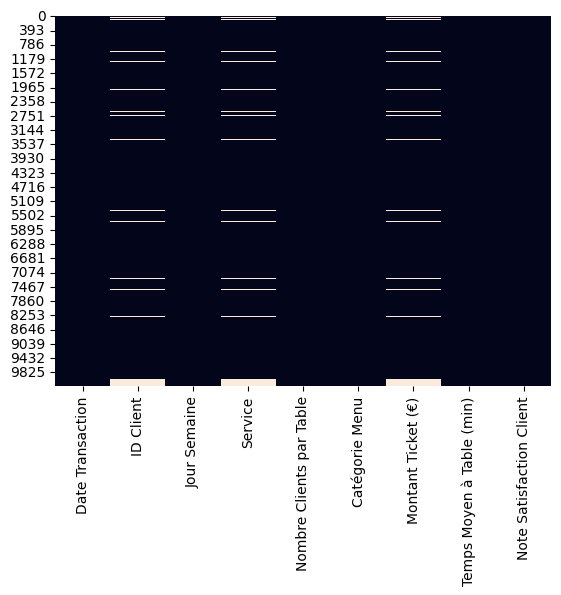

In [7]:
sns.heatmap(df.isna(), cbar=False)

# dans un premier temps je decide d'abord de supprimer les donnees manquantes 

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9700 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date Transaction           9700 non-null   datetime64[ns]
 1   ID Client                  9700 non-null   float64       
 2   Jour Semaine               9700 non-null   object        
 3   Service                    9700 non-null   object        
 4   Nombre Clients par Table   9700 non-null   int64         
 5   Catégorie Menu             9700 non-null   object        
 6   Montant Ticket (€)         9700 non-null   float64       
 7   Temps Moyen à Table (min)  9700 non-null   float64       
 8   Note Satisfaction Client   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 757.8+ KB


In [9]:
df.isna().sum() 

Date Transaction             0
ID Client                    0
Jour Semaine                 0
Service                      0
Nombre Clients par Table     0
Catégorie Menu               0
Montant Ticket (€)           0
Temps Moyen à Table (min)    0
Note Satisfaction Client     0
dtype: int64

# Dans un premier temps, j'ai décidé de supprimer les valeurs manquantes pour être sûr de m'appuyer, dans un premier temps, uniquement sur les données réelles. Ainsi, nous pouvons débuter l'analyse de notre dataset. Nous allons d'abord identifier nos valeurs discrètes et continues.


<h1>Analyse des données</h1>

# variables discretes:
service
nombre Clients par table
categorie Menu
note satisfaction Client
jour semaine
Date Transaction 
ID client

# variables continues:
Temps Moyen a Table(min)
Monttant Ticket(€)

In [10]:
df.columns.to_list()

['Date Transaction',
 'ID Client',
 'Jour Semaine',
 'Service',
 'Nombre Clients par Table',
 'Catégorie Menu',
 'Montant Ticket (€)',
 'Temps Moyen à Table (min)',
 'Note Satisfaction Client']

In [11]:
#ayant un problemes avec les caracteres speciaux je renomme certaines colonnes de notre dataset

df.rename(columns={
    "Date Transaction": "Date_Transaction",
    'ID Client': 'ID_Client',
    'Jour Semaine': 'Jour_Semaine',
    'Nombre Clients par Table': 'Nombre_Clients_par_Table',
    'Catégorie Menu': 'Categorie_Menu',
    'Montant Ticket (€)': 'Montant_Ticket_Euros',
     'Temps Moyen à Table (min)': 'Temps_Moyen_a_Table_min',
     'Note Satisfaction Client': 'Note_Satisfaction_Client'
}, inplace=True)


df.columns.to_list()

['Date_Transaction',
 'ID_Client',
 'Jour_Semaine',
 'Service',
 'Nombre_Clients_par_Table',
 'Categorie_Menu',
 'Montant_Ticket_Euros',
 'Temps_Moyen_a_Table_min',
 'Note_Satisfaction_Client']

# Effectuons d'abord une analyse univariée de quelques variables discrètes.



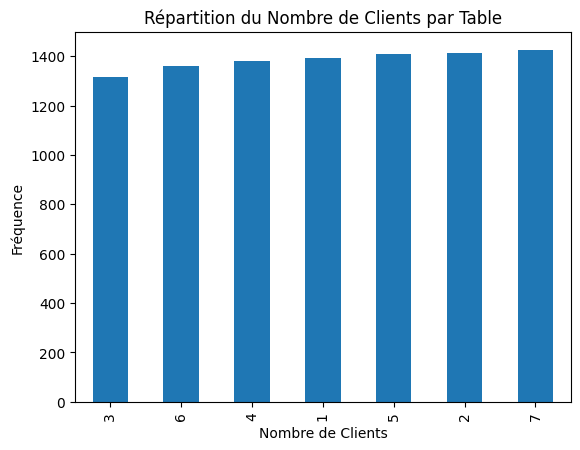

In [ ]:

df['Nombre_Clients_par_Table'].value_counts().sort_values().plot(kind='bar')
plt.title('Répartition du Nombre de Clients par Table')
plt.xlabel('Nombre de Clients')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
df['Nombre_Clients_par_Table'].value_counts().sort_values()

# garce a cette aanlyse on peut voir quon a plus de tables de 7, 2 et 5 clients.

Nombre_Clients_par_Table
3    1314
6    1362
4    1382
1    1393
5    1408
2    1415
7    1426
Name: count, dtype: int64

In [21]:
df['Jour_Semaine'].value_counts().sort_values()

#on constate qu'on a plus de transactions les  samedi et Mardi.

Jour_Semaine
Mercredi    1351
Vendredi    1357
Dimanche    1374
Jeudi       1396
Lundi       1398
Samedi      1399
Mardi       1425
Name: count, dtype: int64

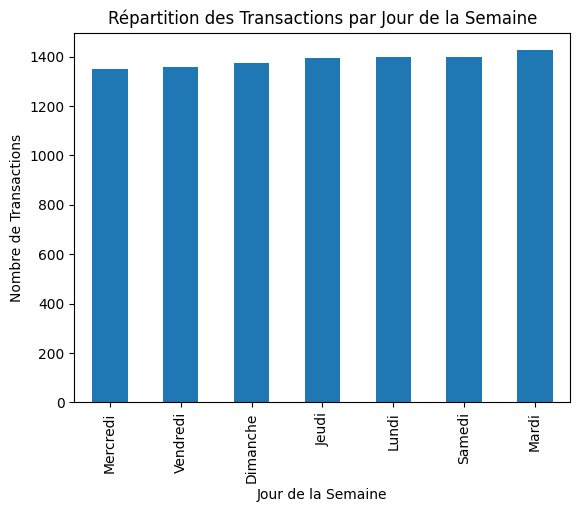

In [70]:
df['Jour_Semaine'].value_counts().sort_values().plot(kind='bar')
plt.title('Répartition des Transactions par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Nombre de Transactions')
plt.show()

# on constate qu'il ya plus de trafic le mardi

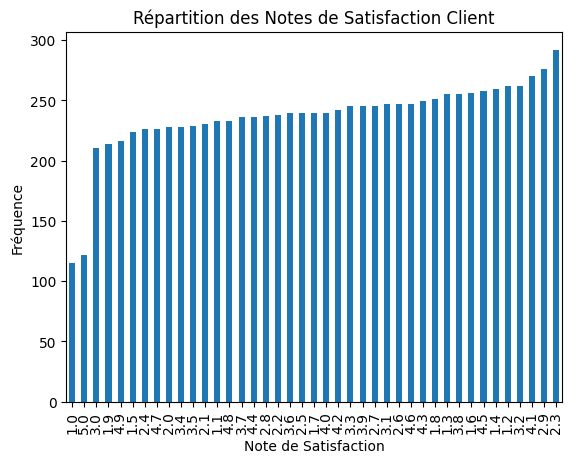

In [ ]:
df['Note_Satisfaction_Client'].value_counts().sort_values().plot(kind='bar')
plt.title('Répartition des Notes de Satisfaction Client')
plt.xlabel('Note de Satisfaction')
plt.ylabel('Fréquence')
plt.show()

# on constate que la plupart des clients donnent une note de 2.9 

In [89]:
df.columns

Index(['Date_Transaction', 'ID_Client', 'Jour_Semaine', 'Service',
       'Nombre_Clients_par_Table', 'Categorie_Menu', 'Montant_Ticket_Euros',
       'Temps_Moyen_a_Table_min', 'Note_Satisfaction_Client'],
      dtype='object')

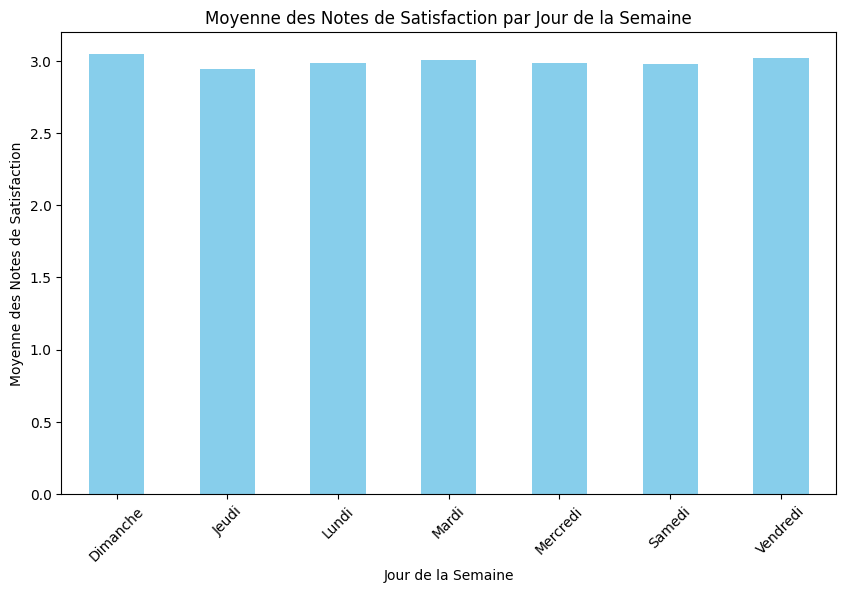

Le jour avec la satisfaction la plus élevée est Dimanche avec une note moyenne de 3.05.


In [93]:
moyenne_satisfaction = df.groupby('Jour_Semaine')['Note_Satisfaction_Client'].mean()


moyenne_satisfaction.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title("Moyenne des Notes de Satisfaction par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Moyenne des Notes de Satisfaction")
plt.xticks(rotation=45)  
plt.show()

jour_max_satisfaction = moyenne_satisfaction.idxmax()
note_max_satisfaction = moyenne_satisfaction.max()

print(f"Le jour avec la satisfaction la plus élevée est {jour_max_satisfaction} avec une note moyenne de {note_max_satisfaction:.2f}.")


In [26]:
df['Categorie_Menu'].value_counts().sort_values()

Categorie_Menu
Boisson + Dessert    1024
Menu complet         1860
Entrée + Plat        2940
Plat seul            3876
Name: count, dtype: int64

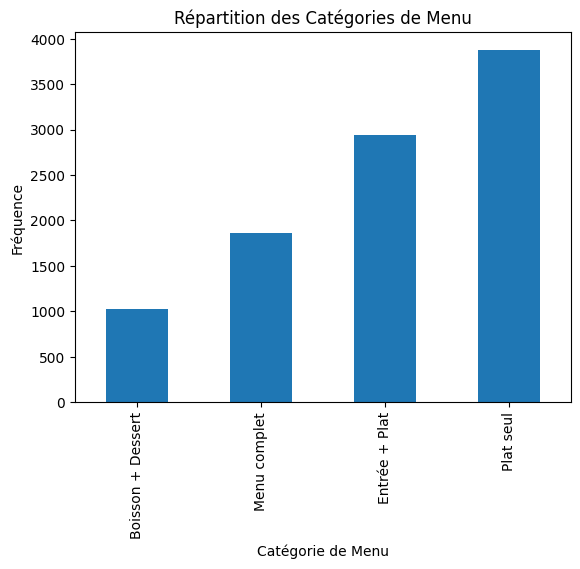

In [28]:
df['Categorie_Menu'].value_counts().sort_values().plot(kind='bar')
plt.title('Répartition des Catégories de Menu')
plt.xlabel('Catégorie de Menu')
plt.ylabel('Fréquence')
plt.show()

# on remarque que la catégorie de menu la plus commandée est le "plat seule".

In [95]:
df.columns

Index(['Date_Transaction', 'ID_Client', 'Jour_Semaine', 'Service',
       'Nombre_Clients_par_Table', 'Categorie_Menu', 'Montant_Ticket_Euros',
       'Temps_Moyen_a_Table_min', 'Note_Satisfaction_Client'],
      dtype='object')

In [97]:
df.groupby("Categorie_Menu")['Montant_Ticket_Euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Categorie_Menu,,,,,,,,
Boisson + Dessert,1024.0,63.087305,33.457057,5.03,33.5675,64.890,92.9875,119.99
Entrée + Plat,2940.0,62.165480,32.742798,5.02,33.5975,61.555,89.2725,119.94
Menu complet,1860.0,61.271419,33.293714,5.01,31.7425,61.320,89.2775,119.98
Plat seul,3876.0,62.442887,32.998538,5.00,34.3775,62.290,91.3100,119.96


In [100]:
df.groupby("Categorie_Menu")['Montant_Ticket_Euros'].mean()


Categorie_Menu
Boisson + Dessert    63.087305
Entrée + Plat        62.165480
Menu complet         61.271419
Plat seul            62.442887
Name: Montant_Ticket_Euros, dtype: float64

In [29]:
df["Service"].value_counts()

Service
Midi    5807
Soir    3893
Name: count, dtype: int64

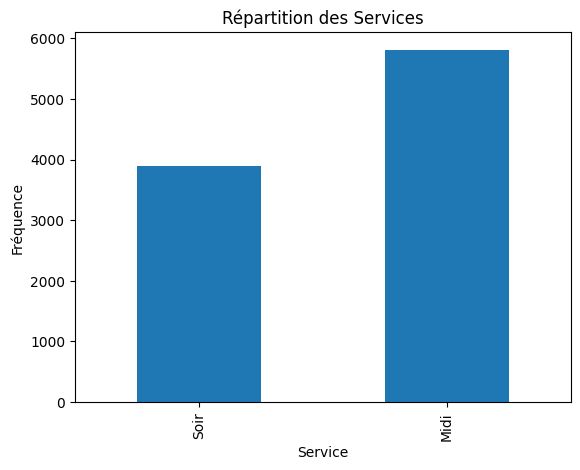

In [31]:
df['Service'].value_counts().sort_values().plot(kind='bar')
plt.title('Répartition des Services')
plt.xlabel('Service')
plt.ylabel('Fréquence')
plt.show()

# on remarque qu'il ya plus de service as "MIdi" ".

# analyse des variables continues

In [ ]:
df['Montant_Ticket_Euros'].describe().round(2)

#ON PEUT VOIR QUE LE MONTANT MINIMUM D'UN TICKET EST DE 5.00 EUROS ET LE MAXIMUM EST DE 119.99 EUROS AVEC UNE MOYENNE DE 62.20 EUROS

count    9700.00
mean       62.20
std        33.03
min         5.00
25%        33.66
50%        61.90
75%        90.44
max       119.99
Name: Montant_Ticket_Euros, dtype: float64

In [ ]:
df.columns

Index(['Date_Transaction', 'ID_Client', 'Jour_Semaine', 'Service',
       'Nombre_Clients_par_Table', 'Categorie_Menu', 'Montant_Ticket_Euros',
       'Temps_Moyen_a_Table_min', 'Note_Satisfaction_Client'],
      dtype='object')

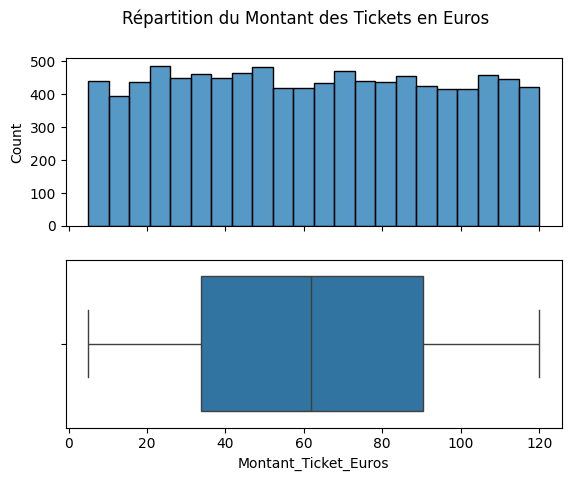

In [40]:
fig , ax = plt.subplots(2, 1 , sharex=True)
plt.suptitle("Répartition du Montant des Tickets en Euros")
sns.histplot(data=df, x='Montant_Ticket_Euros', ax=ax[0])
sns.boxplot(data=df, x='Montant_Ticket_Euros',ax=ax[1])
plt.show()

In [42]:
df['Temps_Moyen_a_Table_min'].describe().round(2)

# on constate que le temps moyen passé à table est de 75.38 minutes avec un minimum de 30.00 minutes et un maximum de 120 minutes.

count    9700.00
mean       75.38
std        25.94
min        30.00
25%        53.20
50%        75.70
75%        97.70
max       120.00
Name: Temps_Moyen_a_Table_min, dtype: float64

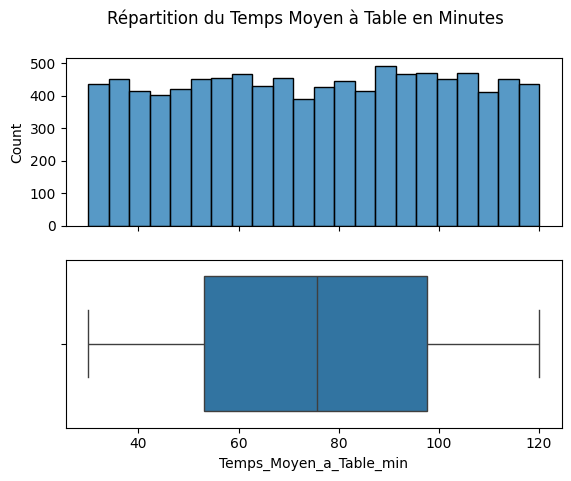

In [43]:
fig , ax = plt.subplots(2,1, sharex=True)
plt.suptitle("Répartition du Temps Moyen à Table en Minutes")
sns.histplot(data=df,x='Temps_Moyen_a_Table_min', ax=ax[0])
sns.boxplot(data=df, x='Temps_Moyen_a_Table_min', ax=ax[1])
plt.show()

<h1>Analyse multivariees de nos variables</h1>

# relation entre le Jour_Semaine et Categorie_Menu

In [44]:
df.columns

Index(['Date_Transaction', 'ID_Client', 'Jour_Semaine', 'Service',
       'Nombre_Clients_par_Table', 'Categorie_Menu', 'Montant_Ticket_Euros',
       'Temps_Moyen_a_Table_min', 'Note_Satisfaction_Client'],
      dtype='object')

In [46]:
crosstab=pd.crosstab(df['Jour_Semaine'],df['Categorie_Menu'],normalize='index')

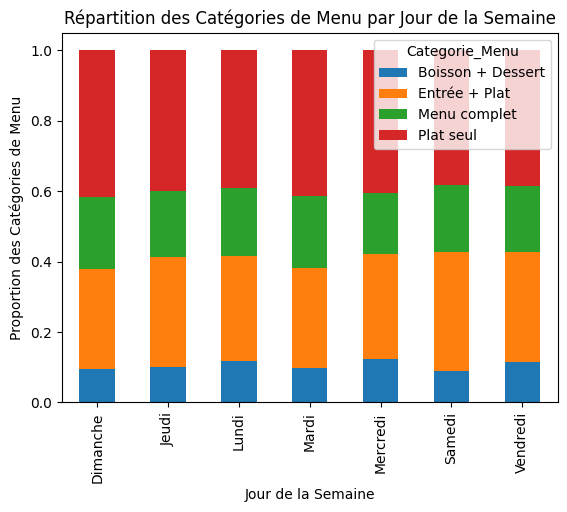

In [47]:
crosstab.plot(kind='bar', stacked=True)
plt.title("Répartition des Catégories de Menu par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Proportion des Catégories de Menu")
plt.show()

In [ ]:
df.groupby('Service')['Montant_Ticket_Euros'].describe().round()

# ici je constate que le ticket moyen est pareil entre midi et le soir visible ici et sur le graphe

,count,mean,std,min,25%,50%,75%,max
Service,,,,,,,,
Midi,5807.0,62.0,33.0,5.0,34.0,62.0,90.0,120.0
Soir,3893.0,62.0,33.0,5.0,33.0,62.0,91.0,120.0


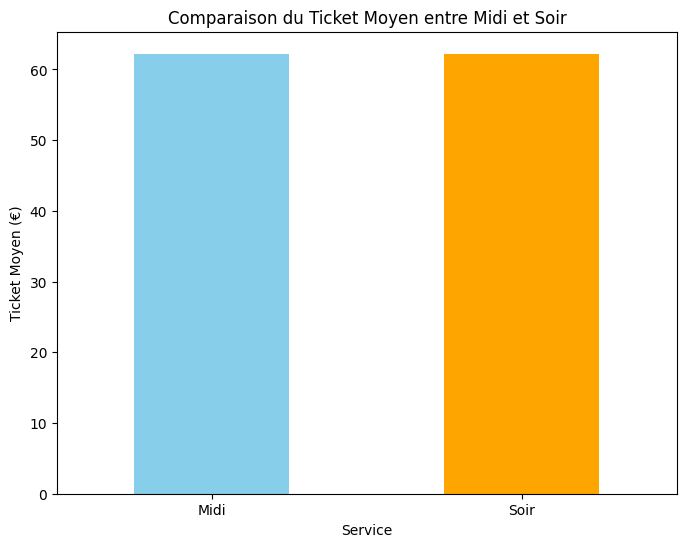

In [ ]:

ticket_moyen_par_service = df.groupby('Service')['Montant_Ticket_Euros'].mean()

ticket_moyen_par_service.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))

plt.title("Comparaison du Ticket Moyen entre Midi et Soir")
plt.xlabel("Service")
plt.ylabel("Ticket Moyen (€)")
plt.xticks(rotation=0)  
plt.show()


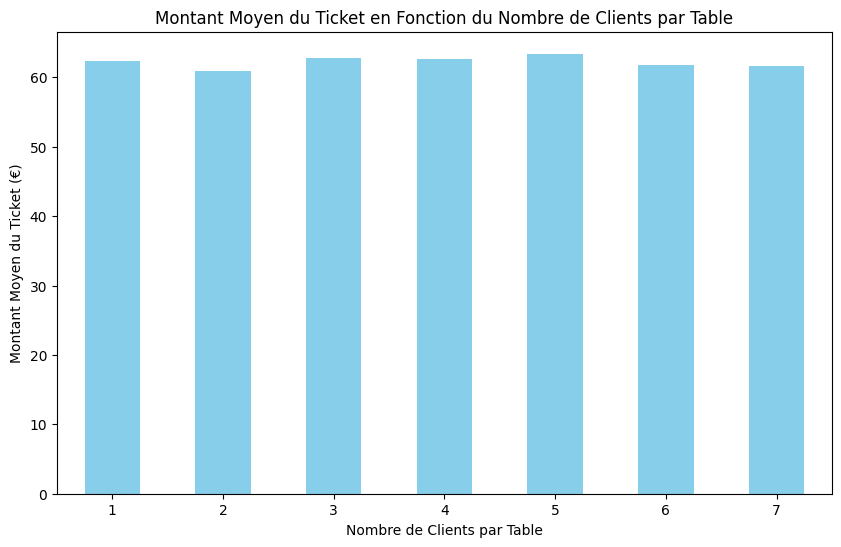

In [79]:

ticket_par_table = df.groupby('Nombre_Clients_par_Table')['Montant_Ticket_Euros'].mean()

ticket_par_table.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title("Montant Moyen du Ticket en Fonction du Nombre de Clients par Table")
plt.xlabel("Nombre de Clients par Table")
plt.ylabel("Montant Moyen du Ticket (€)")
plt.xticks(rotation=0)  
plt.show()


In [80]:
#grace a ca on constate que les tickect ne sont pas plus elevees pour les tables nombreuses

In [81]:
df.columns


Index(['Date_Transaction', 'ID_Client', 'Jour_Semaine', 'Service',
       'Nombre_Clients_par_Table', 'Categorie_Menu', 'Montant_Ticket_Euros',
       'Temps_Moyen_a_Table_min', 'Note_Satisfaction_Client'],
      dtype='object')

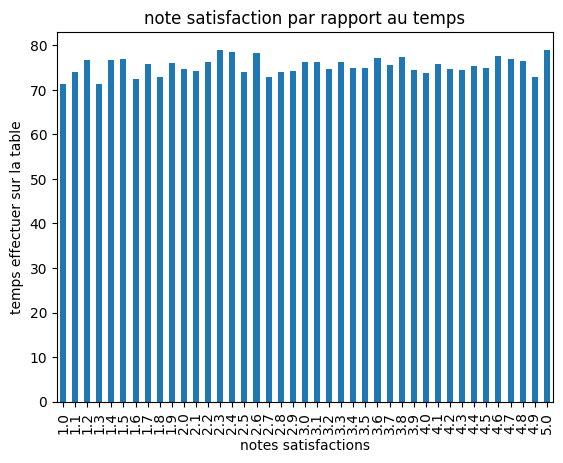

In [84]:
df.groupby("Note_Satisfaction_Client")['Temps_Moyen_a_Table_min'].mean().plot(kind='bar')
plt.title("note satisfaction par rapport au temps")
plt.xlabel("notes satisfactions")
plt.ylabel('temps effectuer sur la table')
plt.show()

In [87]:
correlation = df['Note_Satisfaction_Client'].corr(df['Temps_Moyen_a_Table_min'])
print(f"Corrélation entre le temps passé à table et la note de satisfaction : {correlation.round(3)}")

Corrélation entre le temps passé à table et la note de satisfaction : 0.013


In [88]:
# dapres la correlation entre les deux on se rend compte que la correlation est de 0.013 et proche de zero donc il ya pas de relation entre les deux 

<h1> REPONSES QUESTIONS </h1>